# Question 4 part 2
In this notebook I solve the second part of the question 4:
"Extend the explicit scheme to (1) above."

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### I start by defining the ploblem parameters

In [3]:
### Parameters ###
## domain
Lp = -1
L = 1
##bonduary conditions
u_x0 = 0
u_x1 = 0

## initial condition
def initial_condition (x):

    if (x >= -1 and x <= 0):
        return 1.0 + x
    elif (x > 0 and x <= 1.0):
        return 1.0 - x
 

## equation parameters
a = 1
epsilon = 1
##run parameters
J = 40
delta_x = (L- Lp)/float(J)

delta_t = 0.0012
x_values = []
for j in range(J+1):
    x = Lp + j*delta_x
    x_values.append(x)



### Here I define the explicit scheme

In [6]:
def Un1_explicit_scheme (Un_vec,j, delta_t, delta_x,a = 1,epsilon = 1):
    mu = delta_t/(delta_x*delta_x)
    nu = delta_t/delta_x
    if(a>0):
        fn = a*(Un_vec[j+1] - Un_vec[j])
    elif(a <0):
        fn = a*(Un_vec[j] - Un_vec[j-1])
        
    else:
        fn = 0
    
    return Un_vec[j] + (nu*fn) + (epsilon*mu*(Un_vec[j+1] - (2.0*Un_vec[j]) + Un_vec[j-1]))
    

### Here I will plot the solution

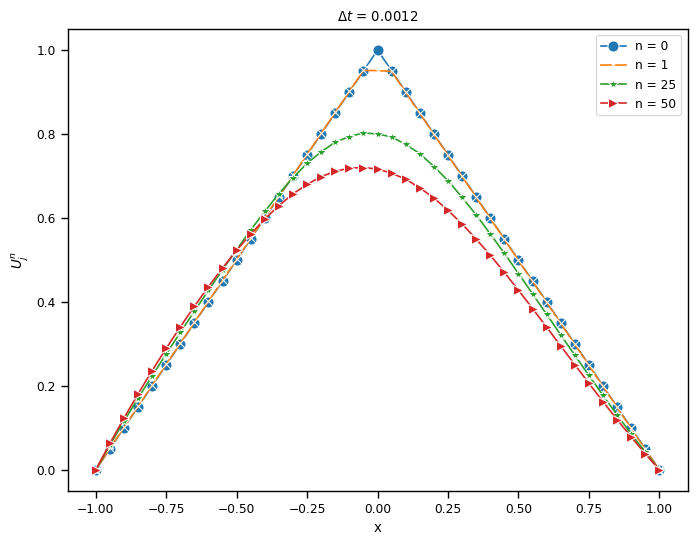

In [8]:
sns.set_context("paper")

h_plot = 1
v_plot = 1

fig, ax = plt.subplots(v_plot, h_plot,  figsize=(8, 6))

time_steps = [0,1,25,50]
markers_vec = ['o', 'x', "*", ">", "+"]
### time step t = 0 ###   
n=0

#calculate the initial condition U0
U0 = []
for j in range(J+1): 
    x = Lp + j*delta_x
    U0.append(initial_condition (x))   
#ploting the IC
sns.lineplot(x=x_values, y=U0, #color = colours[9],
             marker=markers_vec[time_steps.index(0)], markersize = 8, label = f"n = {n}")
ax.set_title(r"$\Delta t$ = " + str(delta_t))
ax.set_xlabel("x")
## time step t = delta_t ###
n= 1
#here I calculate the first row of results for n = 1 (U1)
Un = [0]
for j in range(1,J):
    Un.append(Un1_explicit_scheme (U0,j, delta_t, delta_x))    
Un.append(0)
#ploting the approximation for U1

sns.lineplot(x=x_values, y=Un, 
             marker=markers_vec[time_steps.index(n)], markersize = 10,
             label = f"n = {n}") 


for N in time_steps[2:]:
    while n < N:
        n = n+1
        Un1 = [0]
        for j in range(1,J):
            Un1.append(Un1_explicit_scheme (Un,j, delta_t, delta_x))   
        Un1.append(0)
        Un = Un1
        # here I plot the results for t =n * delta_t
    sns.lineplot(x=x_values, y=Un1, 
                 marker=markers_vec[time_steps.index(n)], markersize = 7,
                     label = f"n = {n}") 
ax.set_ylabel(r"$U_j^{n}$")

plt.savefig('images/Question4-solution_extended_to_eq_1.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'